In [ ]:
import os
import pickle
import imageio
import matplotlib.pyplot as plt
import numpy as np

def load_validation_data(data_folder, mean_image, img_size=32):
    test_file = os.path.join(data_folder, 'val_data')

    d = unpickle(test_file)
    x = d['data']
    y = d['labels']
    x = x / np.float32(255)

    # Labels are indexed from 1, shift it so that indexes start at 0
    y = np.array([i-1 for i in y])

    # Remove mean (computed from training data) from images
    x -= mean_image

    img_size2 = img_size * img_size

    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3)).transpose(0, 3, 1, 2)

    return dict(
        X_test=x,
        Y_test=y.astype('int64'))


def load_data_batch(data_folder, idx, img_size=64):
    data_file = os.path.join(data_folder, 'train_data_batch_')

    d = unpickle(data_file + str(idx))
    x = d['data']
    y = d['labels']
    mean_image = d['mean']

    x = x / np.float32(255)
    mean_image = mean_image / np.float32(255)

    # Labels are indexed from 1, shift it so that indexes start at 0
    y = [i-1 for i in y]
    data_size = x.shape[0]

    x -= mean_image

    img_size2 = img_size * img_size

    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3)).transpose(0, 3, 1, 2)

    # create mirrored images
    X_train = x[0:data_size, :, :, :]
    Y_train = y[0:data_size]
    X_train_flip = X_train[:, :, :, ::-1]
    Y_train_flip = Y_train
    X_train = np.concatenate((X_train, X_train_flip), axis=0)
    Y_train = np.concatenate((Y_train, Y_train_flip), axis=0)

    return dict(
        X_train=X_train,
        Y_train=Y_train.astype('int64'),
        mean=mean_image)

In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

In [ ]:
def get_images(f, img_size=32):

    d = unpickle(f)
    x = d['data']
    img_size = 64
    img_size2 = 64 * 64
    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3))
    print(x.shape)
    return x, d['labels']
    

In [ ]:
for i in range(1000):
    # I don't know the original name of directories in ImageNet.
    # I think 0,1,2...100 is enough
    os.mkdir('imagenet64/val/%05d' % (i+1))
    os.mkdir('imagenet64/train/%05d' % (i+1))

In [65]:
# load validation batch data and decompress and save
data_folder = 'dataset/imagenet64'
num_classes = 1000
test_file = os.path.join(data_folder, 'val_data')
val_data, labels = get_images(test_file, 64)
k = 1
for i, e in enumerate(val_data):
    imageio.imwrite('imagenet64/val/%05d/%08d.png' % (labels[i], i), e)

(50000, 64, 64, 3)


In [60]:
# load train batch data and save into png file
k = 1
for i in range(1, 11):
    f = os.path.join(data_folder, 'train_data_batch_') + str(i)
    train_data, labels = get_images(f, 64)
    print(i)
    print(labels[:3])
    for j, e in enumerate(train_data):
        imageio.imwrite('imagenet64/train/%05d/%08d.png' % (labels[j], k), e)
        k += 1

(128116, 64, 64, 3)
1
[572, 958, 785]
(128116, 64, 64, 3)
2
[464, 917, 257]
(128116, 64, 64, 3)
3
[806, 535, 306]
(128116, 64, 64, 3)
4
[291, 886, 421]
(128116, 64, 64, 3)
5
[37, 319, 292]
(128116, 64, 64, 3)
6
[29, 432, 482]
(128116, 64, 64, 3)
7
[439, 941, 735]
(128116, 64, 64, 3)
8
[758, 258, 381]
(128116, 64, 64, 3)
9
[323, 596, 528]
(128123, 64, 64, 3)
10
[833, 426, 719]


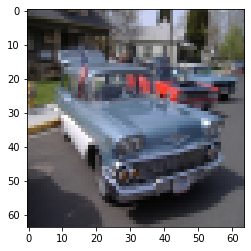

In [28]:
plt.imshow(x[20])